# NLP Sentiment Analysis

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Preprocessing

In [23]:
# Read txt files
test_data = pd.read_csv('data/test.txt', delimiter = "\t", names=['sentence'])
train_data = pd.read_csv('data/train.txt', delimiter = "\t", names=['sentence'])

print(train_data.shape, test_data.shape)
print(train_data.head())

(16000, 1) (2000, 1)
                                            sentence
0                    i didnt feel humiliated;sadness
1  i can go from feeling so hopeless to so damned...
2  im grabbing a minute to post i feel greedy wro...
3  i am ever feeling nostalgic about the fireplac...
4                         i am feeling grouchy;anger


In [25]:
# Column for label
train_data['feeling'] = train_data['sentence'].str.split(';').str[1]
test_data['feeling'] = test_data['sentence'].str.split(';').str[1]

# Remove label part in feature
train_data['sentence'] = train_data['sentence'].str.split(';').str[0]
test_data['sentence'] = test_data['sentence'].str.split(';').str[0]

train_data.head()

,sentence,feeling
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [26]:
# Check unique labels
unique_label_train = train_data['feeling'].unique()
unique_label_test = test_data['feeling'].unique()

num_label = len(unique_label_train)

print(sorted(unique_label_train))
print(sorted(unique_label_test))

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']


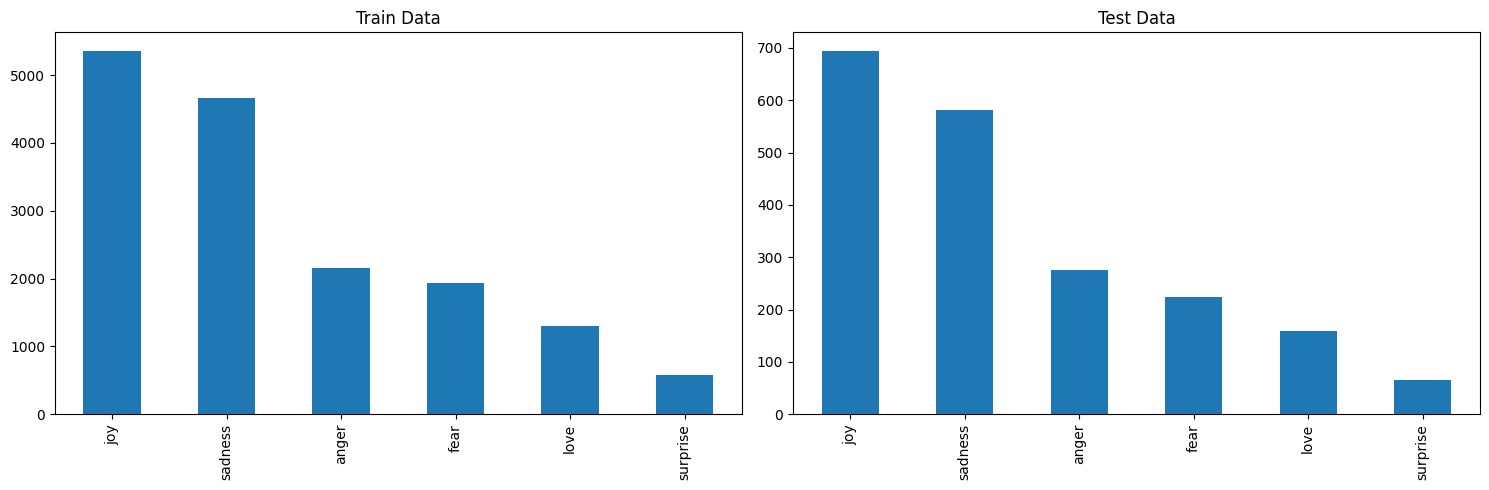

In [32]:
# Plot distribution of labels in train and test data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

train_data['feeling'].value_counts().plot(kind='bar', ax=axes[0], title='Train Data')
test_data['feeling'].value_counts().plot(kind='bar', ax=axes[1], title='Test Data')

plt.tight_layout()
plt.show()

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Fully Connected Neural Network